In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import pandas as pd
sns.set(style='darkgrid')
%matplotlib inline

In [57]:
data_tmp = loadmat('data/ex6data1.mat')

In [58]:
X = data_tmp['X']
y = data_tmp['y']

In [59]:
data = pd.DataFrame(data=X, columns=['X1', 'X2'])
data['y'] = y

In [60]:
data.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


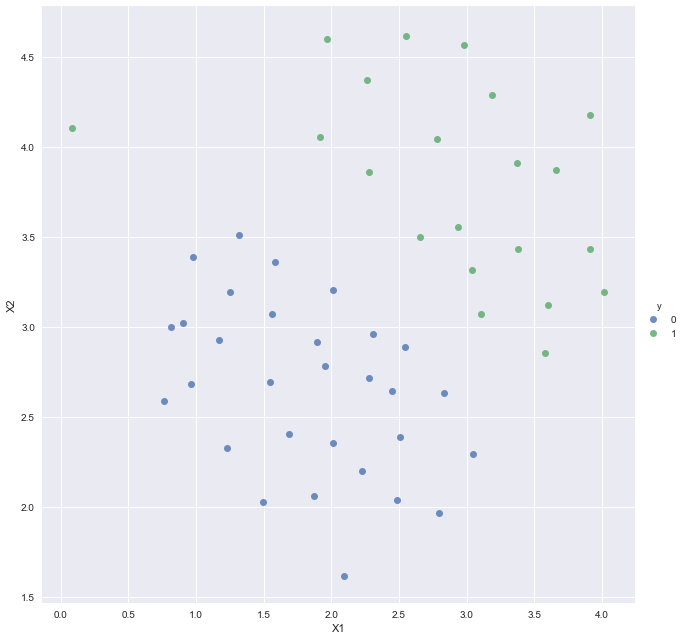

In [78]:
vis = sns.lmplot(x='X1', y='X2', data=data, hue='y', fit_reg=False, size=9)

In [82]:
from sklearn import svm
svc = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [83]:
svc.fit(X, y.ravel())
svc.score(X, y)

0.94117647058823528

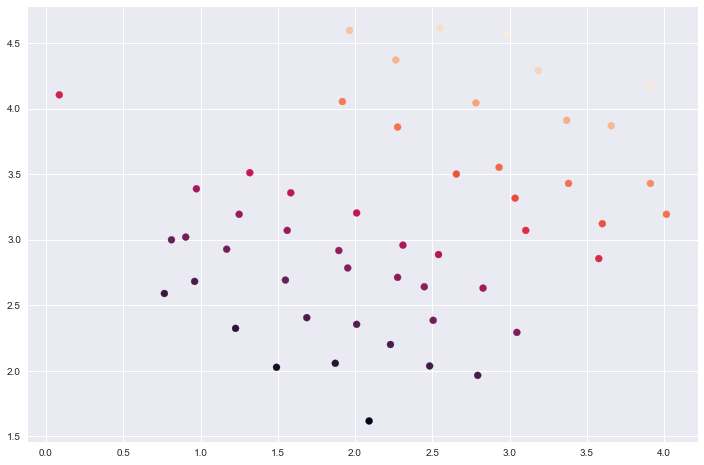

In [84]:
data['svm_confidence'] = svc.decision_function(X)
plt.figure(figsize=[12,8])
#vis = sns.lmplot(x='X1', y='X2', data=data, hue='svm_confidence', fit_reg=False)
plt.scatter(data.X1, data.X2, c=data.svm_confidence)